In [5]:
from epipack import StochasticEpiModel
from epipack.vis import visualize
import networkx as nx
import EoN
import time
import matplotlib.pyplot as plt

In [6]:
k0 = 20
N = int(1e4)
G = nx.fast_gnp_random_graph(N,k0/(N-1))
edges = [ (e[0], e[1], 1.0) for e in \
          G.edges() ]

In [7]:
start = time.time()
S, I, R = list("SIR")
model = StochasticEpiModel(
                compartments=[S,I,R],
                N=N,
                edge_weight_tuples=edges,
                directed=False,
            )

infection_rate = 1.0
model.set_link_transmission_processes([
        ('I', 'S', infection_rate, 'I', 'I'),
    ])
recovery_rate = 5.0
model.set_node_transition_processes([
        ('I', recovery_rate, 'R'),
    ])

model.set_random_initial_conditions({S: int(0.9*N), I: int(0.1*N)})

t_epi, results_epi = model.simulate(tmax=300)

print(time.time() - start)


# set initial conditions with a small number of infected
model.set_random_initial_conditions({'I':20,'S':N-20})

# in every step of the simulation/visualization, let a time of `sampling_dt` pass
sampling_dt = 0.12

# simulate and visualize, do not plot the "S" count,
# and remove links from nodes that transition to "X
visualize(model, edges, sampling_dt, ignore_plot_compartments=['S'])

4.569666385650635


TypeError: list indices must be integers or slices, not str

In [ ]:
start = time.time()
t, S, I, R = EoN.Gillespie_SIR(G, 1.0, 5.0, rho=0.1, tmin=0, tmax=300)
print(time.time() - start)

0.4105372428894043


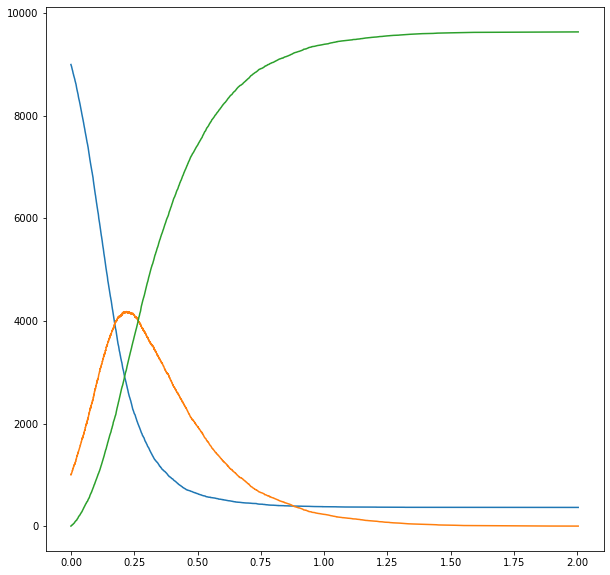

In [40]:
plt.figure(figsize=(10, 10))
for c in model.compartments:
    plt.plot(t_epi, results_epi[c])
plt.show()

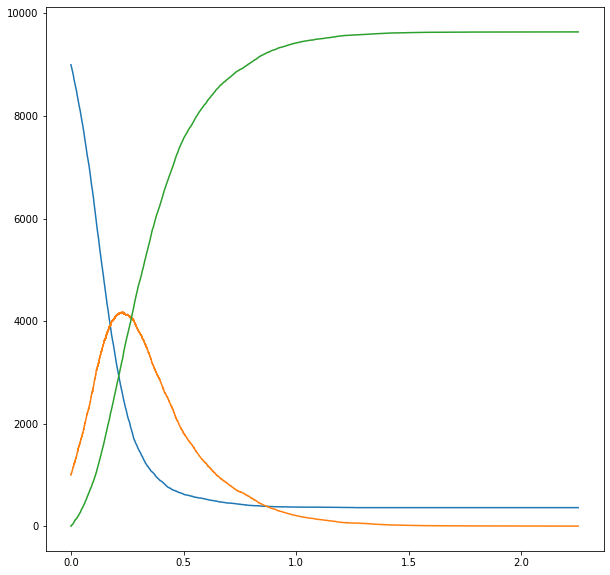

In [41]:
plt.figure(figsize=(10, 10))
plt.plot(t, S)
plt.plot(t, I)
plt.plot(t, R)
plt.show()